#Python NFL Primer

Step One: Go File > Save a copy in drive.
This way, you can edit the file.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

plt.style.use('fivethirtyeight')

How to upload data! Make sure the file yearly_data.csv is in the left hand bar before running the below cell

In [ ]:
df = pd.read_csv("yearly_data.csv")

# How to view all columns

In [ ]:
df.columns

Index(['id', 'name', 'position', 'team', 'season', 'season_type',
       'completions', 'attempts', 'passing_yards', 'passing_tds',
       'interceptions', 'sacks', 'sack_yards', 'sack_fumbles',
       'sack_fumbles_lost', 'passing_air_yards', 'passing_yards_after_catch',
       'passing_first_downs', 'passing_2pt_conversions', 'carries',
       'rushing_yards', 'rushing_tds', 'rushing_fumbles',
       'rushing_fumbles_lost', 'rushing_first_downs',
       'rushing_2pt_conversions', 'receptions', 'targets', 'receiving_yards',
       'receiving_tds', 'receiving_fumbles', 'receiving_fumbles_lost',
       'receiving_air_yards', 'receiving_yards_after_catch',
       'receiving_first_downs', 'receiving_2pt_conversions', 'target_share',
       'air_yards_share', 'fantasy_points', 'fantasy_points_ppr',
       'total_yards', 'games', 'offense_snaps', 'teams_offense_snaps', 'ypa',
       'ypc', 'ypr', 'touches', 'count', 'comp_percentage',
       'pass_td_percentage', 'int_percentage', 'rush_td_

In [ ]:
df

,id,name,position,team,season,season_type,completions,attempts,passing_yards,passing_tds,...,ypg,pr,rookie_season,round,overall,ht,wt,forty,vertical,years_played
0,1,A.J. Brown,WR,PHI,2022,REG,0,0,0,0,...,0.000000,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,A.J. Brown,WR,TEN,2019,REG,0,0,0,0,...,0.000000,33.87,2019.0,2.0,51.0,Jun-00,226.0,4.49,36.5,1.0
2,1,A.J. Brown,WR,TEN,2020,REG,0,0,0,0,...,0.000000,33.87,2019.0,2.0,51.0,Jun-00,226.0,4.49,36.5,2.0
3,1,A.J. Brown,WR,TEN,2021,REG,0,2,0,0,...,0.000000,33.87,2019.0,2.0,51.0,Jun-00,226.0,4.49,36.5,3.0
4,2,A.J. Derby,TE,DEN,2016,REG,0,0,0,0,...,0.000000,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6176,1767,Zay Jones,WR,LV,2020,REG,1,1,29,0,...,2.636364,113.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6177,1767,Zay Jones,WR,LV,2021,REG,0,0,0,0,...,0.000000,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6178,1768,Zonovan Knight,RB,NYJ,2022,REG,0,0,0,0,...,0.000000,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6179,1769,Zurlon Tipton,RB,IND,2014,REG,0,0,0,0,...,0.000000,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


What does the below code do? There's 5 parts:
1. df.loc essentially looks for all rows satisfying the given condition
2. In this case, the condition is that the value in the "position" column is equal to "WR". We can change this to "RB" to get all running backs, for example.
3. ["name"] means that we're asking to return only the name column of the filtered rows
4. unique() will return the unique names. This is important here because there's a different row for each season for each player. If we want each name shown only once, we need to add unique()
5. [:10] returns the first 10 values. Without this, we'll have all of the unique names of WRs in the dataframe

In [ ]:
df.loc[df.position == "WR"]["name"].unique()[:10] # Remove the "[:10]" to get all WRs in the dataset

array(['A.J. Brown', 'A.J. Green', 'A.J. Jenkins', 'Aaron Burbridge',
       'Aaron Dobson', 'Ace Sanders', 'Adam Humphries', 'Adam Thielen',
       'Albert Wilson', 'Aldrick Robinson'], dtype=object)

Let's try exploring a WR-only dataset. The first step, we'll need to create a subset dataframe:

In [ ]:
wideDF = df.loc[df.position == "WR"] #We only use the first portion of the above code, because we still want all columns and rows.

wideDF.describe() # This gives us a bit of an overview of the datset
wideDF.sort_values("sacks", ascending = False)

,id,name,position,team,season,season_type,completions,attempts,passing_yards,passing_tds,...,ypg,pr,rookie_season,round,overall,ht,wt,forty,vertical,years_played
5633,1602,Terrelle Pryor,WR,LV,2013,REG,156,272,1798,7,...,163.454545,80.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,24,Albert Wilson,WR,MIA,2019,REG,1,2,20,0,...,1.538462,79.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
963,251,Cedrick Wilson,WR,MIA,2022,REG,0,0,0,0,...,0.000000,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4713,1342,Odell Beckham,WR,NYG,2016,REG,0,0,0,0,...,0.000000,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3561,1026,Keenan Allen,WR,LAC,2018,REG,0,0,0,0,...,0.000000,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,561,Donnie Avery,WR,KC,2014,REG,0,0,0,0,...,0.000000,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,562,Donovan Peoples-Jones,WR,CLE,2020,REG,0,0,0,0,...,0.000000,33.87,2020.0,6.0,187.0,2-Jun,212.0,4.48,44.5,1.0
2021,562,Donovan Peoples-Jones,WR,CLE,2021,REG,0,0,0,0,...,0.000000,33.87,2020.0,6.0,187.0,2-Jun,212.0,4.48,44.5,2.0
2022,562,Donovan Peoples-Jones,WR,CLE,2022,REG,0,0,0,0,...,0.000000,33.87,2020.0,6.0,187.0,2-Jun,212.0,4.48,44.5,3.0


In [ ]:
wideDF.head()

,id,name,position,team,season,season_type,completions,attempts,passing_yards,passing_tds,...,ypg,pr,rookie_season,round,overall,ht,wt,forty,vertical,years_played
0,1,A.J. Brown,WR,PHI,2022,REG,0,0,0,0,...,0.0,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,A.J. Brown,WR,TEN,2019,REG,0,0,0,0,...,0.0,33.87,2019.0,2.0,51.0,Jun-00,226.0,4.49,36.5,1.0
2,1,A.J. Brown,WR,TEN,2020,REG,0,0,0,0,...,0.0,33.87,2019.0,2.0,51.0,Jun-00,226.0,4.49,36.5,2.0
3,1,A.J. Brown,WR,TEN,2021,REG,0,2,0,0,...,0.0,33.87,2019.0,2.0,51.0,Jun-00,226.0,4.49,36.5,3.0
11,4,A.J. Green,WR,ARI,2021,REG,0,0,0,0,...,0.0,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
wideDF.loc[wideDF.name == "Julio Jones"]

,id,name,position,team,season,season_type,completions,attempts,passing_yards,passing_tds,...,ypg,pr,rookie_season,round,overall,ht,wt,forty,vertical,years_played
3411,979,Julio Jones,WR,ATL,2012,REG,0,0,0,0,...,0.0,33.87,2011.0,1.0,6.0,3-Jun,220.0,4.34,38.5,2.0
3412,979,Julio Jones,WR,ATL,2013,REG,0,0,0,0,...,0.0,33.87,2011.0,1.0,6.0,3-Jun,220.0,4.34,38.5,3.0
3413,979,Julio Jones,WR,ATL,2014,REG,0,0,0,0,...,0.0,33.87,2011.0,1.0,6.0,3-Jun,220.0,4.34,38.5,4.0
3414,979,Julio Jones,WR,ATL,2015,REG,0,0,0,0,...,0.0,33.87,2011.0,1.0,6.0,3-Jun,220.0,4.34,38.5,5.0
3415,979,Julio Jones,WR,ATL,2016,REG,0,0,0,0,...,0.0,33.87,2011.0,1.0,6.0,3-Jun,220.0,4.34,38.5,6.0
3416,979,Julio Jones,WR,ATL,2017,REG,0,0,0,0,...,0.0,33.87,2011.0,1.0,6.0,3-Jun,220.0,4.34,38.5,7.0
3417,979,Julio Jones,WR,ATL,2018,REG,0,0,0,0,...,0.0,33.87,2011.0,1.0,6.0,3-Jun,220.0,4.34,38.5,8.0
3418,979,Julio Jones,WR,ATL,2019,REG,0,0,0,0,...,0.0,33.87,2011.0,1.0,6.0,3-Jun,220.0,4.34,38.5,9.0
3419,979,Julio Jones,WR,ATL,2020,REG,0,0,0,0,...,0.0,33.87,2011.0,1.0,6.0,3-Jun,220.0,4.34,38.5,10.0
3420,979,Julio Jones,WR,TB,2022,REG,0,0,0,0,...,0.0,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The above says we have 2400 wide recievers, but that's because it's counting each wide reciever season as it's own person. How can we change that? Below are two ways:

In [ ]:
print(len(df.loc[df.position == "WR"]["name"].unique())) # Can anyone explain how/why this works?
# The same thing, with the filtered dataset:
print(len(wideDF["id"].unique()))

print(len(wideDF.groupby("name"))) # What does this code do?

indWRDF = wideDF.groupby("name").agg("mean", numeric_only = True)
indWRDF

724
724
724


,id,season,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_yards,sack_fumbles,...,ppr_ppg,ypg,pr,rookie_season,round,overall,wt,forty,vertical,years_played
name,,,,,,,,,,,,,,,,,,,,,
A.J. Brown,1.0,2020.500000,0.000000,0.500000,0.000000,0.000,0.0,0.0,0.0,0.0,...,15.696559,0.000000,33.87000,2019.0,2.0,51.0,226.0,4.49,36.5,2.000
A.J. Green,4.0,2016.800000,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0,...,14.302429,0.000000,33.87000,2011.0,1.0,4.0,211.0,4.48,34.5,5.625
A.J. Jenkins,5.0,2013.000000,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0,...,1.890476,0.000000,33.87000,2012.0,1.0,30.0,190.0,4.37,38.5,1.000
Aaron Burbridge,7.0,2016.000000,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0,...,1.975000,0.000000,33.87000,2016.0,6.0,213.0,206.0,4.56,30.5,1.000
Aaron Dobson,8.0,2014.000000,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0,...,5.493434,0.000000,33.87000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wes Welker,1742.0,2013.500000,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0,...,11.322150,0.000000,33.87000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Will Fuller,1745.0,2018.500000,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0,...,11.552900,0.000000,33.87000,2016.0,1.0,21.0,186.0,4.32,33.5,3.000
Willie Snead,1751.0,2018.375000,0.125000,0.125000,6.250000,0.125,0.0,0.0,0.0,0.0,...,6.535047,0.416667,48.71375,NaN,NaN,NaN,NaN,NaN,NaN,NaN


What if we want to sort these wide recievers by their average stats over their career?

In [ ]:
indWRDF.sort_values("receptions", ascending = False)

,id,season,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_yards,sack_fumbles,...,ppr_ppg,ypg,pr,rookie_season,round,overall,wt,forty,vertical,years_played
name,,,,,,,,,,,,,,,,,,,,,
Justin Jefferson,995.0,2021.0,1.333333,2.000,23.0,0.0,0.0,0.000,0.00,0.0,...,19.419559,1.352941,73.803333,2020.0,1.0,22.0,202.0,4.43,37.5,2.0
Amon-Ra St. Brown,51.0,2021.5,0.000000,0.000,0.0,0.0,0.0,0.000,0.00,0.0,...,15.465625,0.000000,33.870000,2021.0,4.0,112.0,197.0,4.51,38.5,1.5
Calvin Johnson,233.0,2013.5,0.000000,0.000,0.0,0.0,0.0,0.000,0.00,0.0,...,19.208276,0.000000,33.870000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jaylen Waddle,833.0,2021.5,0.000000,0.000,0.0,0.0,0.0,0.000,0.00,0.0,...,15.367280,0.000000,33.870000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stefon Diggs,1548.0,2018.5,0.000000,0.125,0.0,0.0,0.0,0.125,0.25,0.0,...,16.190430,0.000000,33.870000,2015.0,5.0,146.0,195.0,4.46,35.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K.J. Brent,1001.0,2017.0,0.000000,0.000,0.0,0.0,0.0,0.000,0.00,0.0,...,0.000000,0.000000,33.870000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Julian Talley,978.0,2013.0,0.000000,0.000,0.0,0.0,0.0,0.000,0.00,0.0,...,0.000000,0.000000,33.870000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Josh Ali,948.0,2022.0,0.000000,0.000,0.0,0.0,0.0,0.000,0.00,0.0,...,0.000000,0.000000,33.870000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ok, but in the above we can't even see the WR specific stats. Let's try a temporary way of fixing that first:

In [ ]:
indWRDF[["season", "receptions", 'targets', 'receiving_yards',
                                                      'receiving_tds', 'receiving_fumbles', 'receiving_fumbles_lost',
                                                      'receiving_air_yards', 'receiving_yards_after_catch','receiving_first_downs',
                                                      'receiving_2pt_conversions']]

,season,receptions,targets,receiving_yards,receiving_tds,receiving_fumbles,receiving_fumbles_lost,receiving_air_yards,receiving_yards_after_catch,receiving_first_downs,receiving_2pt_conversions
name,,,,,,,,,,,
A.J. Brown,2020.500000,68.250000,110.000000,1122.750000,8.750000,1.250000,0.750000,1307.250000,420.000000,49.500000,0.000000
A.J. Green,2016.800000,66.200000,115.300000,945.700000,6.300000,1.000000,0.700000,1484.300000,247.000000,45.000000,0.100000
A.J. Jenkins,2013.000000,5.666667,11.000000,74.333333,0.000000,0.000000,0.000000,111.000000,29.000000,3.000000,0.000000
Aaron Burbridge,2016.000000,7.000000,16.000000,88.000000,0.000000,0.000000,0.000000,139.000000,43.000000,5.000000,0.000000
Aaron Dobson,2014.000000,17.666667,32.666667,232.666667,1.333333,0.333333,0.000000,419.333333,78.333333,12.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
Wes Welker,2013.500000,63.250000,93.000000,674.500000,4.500000,0.500000,0.250000,675.750000,313.000000,37.500000,0.000000
Will Fuller,2018.500000,35.500000,56.833333,522.666667,4.000000,0.166667,0.000000,822.500000,170.500000,23.666667,0.166667
Willie Snead,2018.375000,34.875000,52.250000,428.875000,2.000000,0.625000,0.125000,440.875000,171.375000,22.750000,0.000000


In [ ]:
indWRDF.sort_values("receptions", ascending = False)[["season", "receptions", 'targets', 'receiving_yards',
                                                      'receiving_tds', 'receiving_fumbles', 'receiving_fumbles_lost',
                                                      'receiving_air_yards', 'receiving_yards_after_catch','receiving_first_downs',
                                                      'receiving_2pt_conversions']]

,season,receptions,targets,receiving_yards,receiving_tds,receiving_fumbles,receiving_fumbles_lost,receiving_air_yards,receiving_yards_after_catch,receiving_first_downs,receiving_2pt_conversions
name,,,,,,,,,,,
Justin Jefferson,2021.0,108.000,158.666667,1608.333333,8.333333,0.666667,0.333333,1784.333333,516.00,71.000,1.000
Amon-Ra St. Brown,2021.5,98.000,132.500000,1036.500000,5.500000,0.000000,0.000000,889.500000,475.00,58.000,1.000
Calvin Johnson,2013.5,91.250,159.500000,1436.750000,8.500000,1.250000,1.250000,2194.500000,371.50,71.250,0.000
Jaylen Waddle,2021.5,89.500,128.500000,1185.500000,7.000000,1.000000,0.500000,1204.000000,474.50,59.500,0.000
Stefon Diggs,2018.5,87.875,127.250000,1101.500000,7.375000,1.000000,0.375000,1353.875000,357.25,52.625,0.125
...,...,...,...,...,...,...,...,...,...,...,...
K.J. Brent,2017.0,0.000,1.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.00,0.000,0.000
Julian Talley,2013.0,0.000,2.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.00,0.000,0.000
Josh Ali,2022.0,0.000,1.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.00,0.000,0.000


This way we can see the stats, but we don't want that large filter every time we try to see stuff from this dataframe. So let's drop some less important columns

In [ ]:
indWRDF.sort_values("rec_ypg")
indWRDF = indWRDF.drop(columns=['completions', 'attempts', 'passing_yards', 'passing_tds',
       'interceptions', 'sacks', 'sack_yards', 'sack_fumbles',
       'sack_fumbles_lost', 'passing_air_yards', 'passing_yards_after_catch',
       'passing_first_downs', 'passing_2pt_conversions', 'carries',
       'rushing_yards', 'rushing_tds', 'rushing_fumbles',
       'rushing_fumbles_lost', 'rushing_first_downs',
       'rushing_2pt_conversions'])
print(indWRDF.columns)
indWRDF.sort_values("rec_ypg")

KeyError: ignored

In [ ]:
indWRDF.sort_values("rec_ypg", ascending = False)

,id,season,receptions,targets,receiving_yards,receiving_tds,receiving_fumbles,receiving_fumbles_lost,receiving_air_yards,receiving_yards_after_catch,...,ppr_ppg,ypg,pr,rookie_season,round,overall,wt,forty,vertical,years_played
name,,,,,,,,,,,,,,,,,,,,,
Calvin Johnson,233.0,2013.5,91.250000,159.500000,1436.750000,8.500000,1.250000,1.250000,2194.500000,371.500000,...,19.208276,0.000000,33.870000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Justin Jefferson,995.0,2021.0,108.000000,158.666667,1608.333333,8.333333,0.666667,0.333333,1784.333333,516.000000,...,19.419559,1.352941,73.803333,2020.0,1.0,22.0,202.0,4.43,37.5,2.0
Julio Jones,979.0,2017.0,77.181818,119.818182,1151.818182,5.000000,0.909091,0.454545,1495.909091,366.090909,...,16.860124,0.000000,33.870000,2011.0,1.0,6.0,220.0,4.34,38.5,6.0
Ja'Marr Chase,734.0,2021.5,84.000000,131.000000,1250.500000,11.000000,2.000000,1.500000,1411.000000,543.500000,...,19.058823,0.000000,33.870000,2021.0,1.0,5.0,201.0,4.34,41.0,1.5
Antonio Brown,84.0,2016.5,84.300000,126.300000,1101.600000,8.100000,0.700000,0.300000,1379.200000,401.500000,...,19.395884,0.218750,69.496000,2010.0,6.0,195.0,186.0,4.56,33.5,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Solomon Patton,1540.0,2014.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.900000,0.000000,33.870000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
De'Andre Presley,470.0,2014.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,...,-0.200000,0.000000,33.870000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marquis Bundy,1202.0,2017.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,...,0.000000,0.000000,33.870000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Let's choose a single player to look at! Try changing the player name in the first variable
*You can also change the values in the y and y2 variables to any of the column names (see above)*

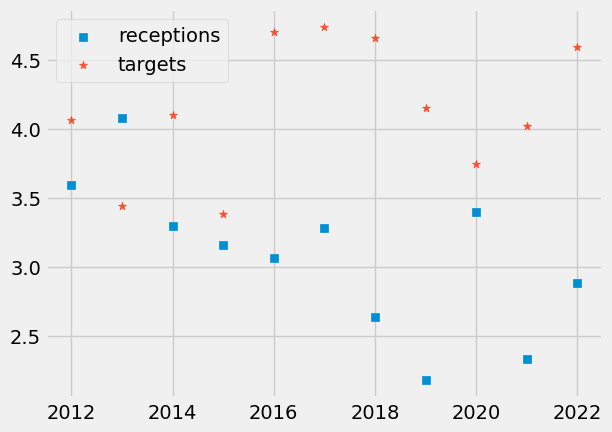

In [ ]:
player = "Julio Jones"
playerDF = df.loc[df.name == player]
x = "season"
y = "receptions"
y2 = "targets"

plt.scatter(playerDF[x], playerDF["receiving_yards_after_catch"]/playerDF["targets"], label = y, marker = 's')
plt.scatter(playerDF[x], playerDF["receiving_air_yards"]/(3*playerDF["targets"]), label = y2, marker = '*')
plt.legend()
plt.show()



# Checkpoint one: Upload the above graphic you've created to the following drive folder: https://drive.google.com/drive/folders/1wkxC9Mx7yh-m_iMnaKWkpVOKN4xT4jYL?usp=share_link

In [ ]:
df.columns

Index(['id', 'name', 'position', 'team', 'season', 'season_type',
       'completions', 'attempts', 'passing_yards', 'passing_tds',
       'interceptions', 'sacks', 'sack_yards', 'sack_fumbles',
       'sack_fumbles_lost', 'passing_air_yards', 'passing_yards_after_catch',
       'passing_first_downs', 'passing_2pt_conversions', 'carries',
       'rushing_yards', 'rushing_tds', 'rushing_fumbles',
       'rushing_fumbles_lost', 'rushing_first_downs',
       'rushing_2pt_conversions', 'receptions', 'targets', 'receiving_yards',
       'receiving_tds', 'receiving_fumbles', 'receiving_fumbles_lost',
       'receiving_air_yards', 'receiving_yards_after_catch',
       'receiving_first_downs', 'receiving_2pt_conversions', 'target_share',
       'air_yards_share', 'fantasy_points', 'fantasy_points_ppr',
       'total_yards', 'games', 'offense_snaps', 'teams_offense_snaps', 'ypa',
       'ypc', 'ypr', 'touches', 'count', 'comp_percentage',
       'pass_td_percentage', 'int_percentage', 'rush_td_

# Now let's try a different chart

Look at the below code, and see the differences between a bar chart and a scatter chart. Try overlaying the two. What are the benefits, and what's harder to see?

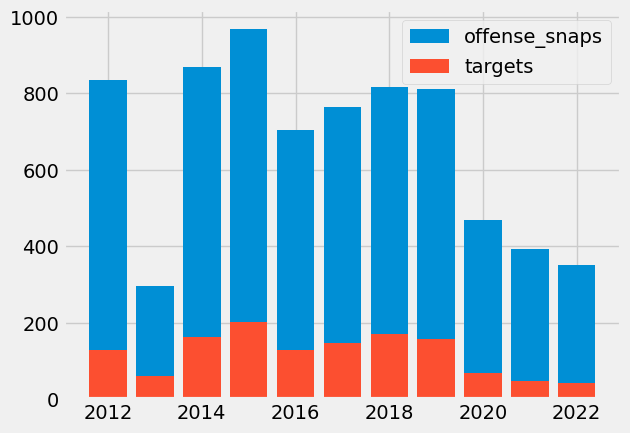

In [ ]:
player = "Julio Jones"
playerDF = df.loc[df.name == player]
x = "season" # Are there other x axes that could be used?
y = "offense_snaps"
y2 = "targets" # Currently unused

plt.bar(playerDF[x], playerDF[y], label = y)
plt.bar(playerDF[x], playerDF[y2], label = y2)
#plt.scatter(playerDF[x], playerDF[y2], label = y2)
plt.legend() # This command shows the legend
plt.show() # Try running this cell with and without this line; what's the difference?

The following code gets pretty complex. Try and decipher what's happening to get the filtered subset "wrDF". What are the filter conditions? (Hint: There's 3)

In [ ]:
wrDF = df.loc[(df.position == "WR") & ((df.season == 2015) | (df.season == 2022))].loc[df.receptions > 80].reset_index()
wrDF


,index,id,name,position,team,season,season_type,completions,attempts,passing_yards,...,ypg,pr,rookie_season,round,overall,ht,wt,forty,vertical,years_played
0,0,1,A.J. Brown,WR,PHI,2022,REG,0,0,0,...,0.0000,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16,4,A.J. Green,WR,CIN,2015,REG,0,0,0,...,0.0000,33.87,2011.0,1.0,4.0,4-Jun,211.0,4.48,34.5,5.0
2,234,51,Amon-Ra St. Brown,WR,DET,2022,REG,0,0,0,...,0.0000,33.87,2021.0,4.0,112.0,11-May,197.0,4.51,38.5,2.0
3,367,84,Antonio Brown,WR,PIT,2015,REG,0,0,0,...,0.0000,33.87,2010.0,6.0,195.0,10-May,186.0,4.56,33.5,6.0
4,609,158,Brandin Cooks,WR,NO,2015,REG,0,0,0,...,0.0000,33.87,2014.0,1.0,20.0,10-May,189.0,4.33,36.0,2.0
5,656,172,Brandon Marshall,WR,NYJ,2015,REG,0,0,0,...,0.0000,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,875,233,Calvin Johnson,WR,DET,2015,REG,0,0,0,...,0.0000,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,966,252,CeeDee Lamb,WR,DAL,2022,REG,0,0,0,...,0.0000,33.87,2020.0,1.0,17.0,2-Jun,198.0,4.50,34.5,3.0
8,1088,286,Chris Godwin,WR,TB,2022,REG,0,0,0,...,0.0000,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1170,307,Christian Kirk,WR,JAX,2022,REG,0,1,0,...,0.0000,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


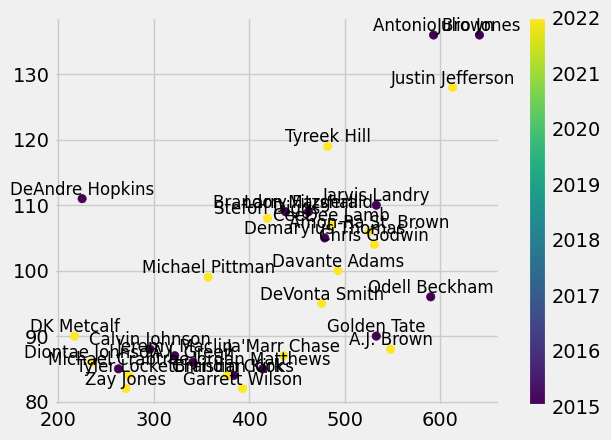

In [ ]:
wrDF = df.loc[(df.position == "WR") & ((df.season == 2015) | (df.season == 2022))].loc[df.receptions > 80].reset_index(drop=True)
plt.scatter(wrDF.receiving_yards_after_catch, wrDF.receptions, c = wrDF.season)
plt.colorbar() # This provides an array of color on the side, based on the values in the above c=wrDF.season
for i, label in enumerate(wrDF.name): #This adds an annotation on each scatter dot
    plt.text(wrDF.receiving_yards_after_catch[i], wrDF.receptions[i], label, fontsize=12, ha='center', va='bottom')
plt.show()

In [ ]:
wrDF.head()

Ok, we've done some experimenting with basic visualization stuff; now let's start doing some actual comparisons.

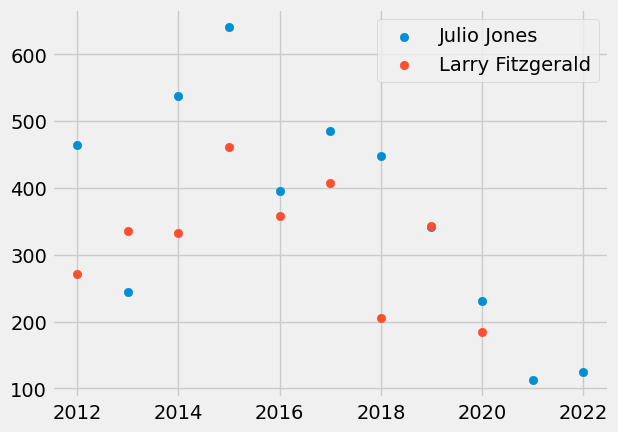

In [ ]:
player = "Julio Jones"
player2 = "Larry Fitzgerald"
playerDF = df.loc[df.name == player]
player2DF = df.loc[df.name == player2]
x = "season"
y = "receiving_yards_after_catch"

plt.scatter(playerDF[x], playerDF[y], label = player)
plt.scatter(player2DF[x], player2DF[y], label = player2)
plt.legend()
plt.show()

Let's add some more players.

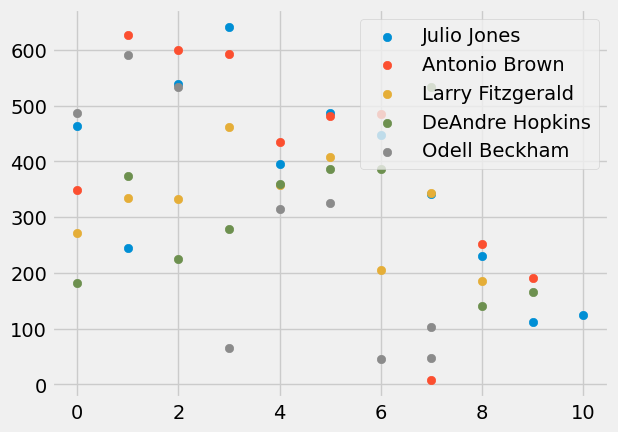

In [ ]:
players = ["Julio Jones", "Antonio Brown", "Larry Fitzgerald", "DeAndre Hopkins", "Odell Beckham"]
x = "season"
y = "receiving_yards_after_catch"

for player in players:
  playerDF = df.loc[df.name == player]
  rookie = min(playerDF.season)
  plt.scatter(playerDF[x]-rookie, playerDF[y], label = player)

plt.legend()
plt.show()

Now let's try to color code it based on team

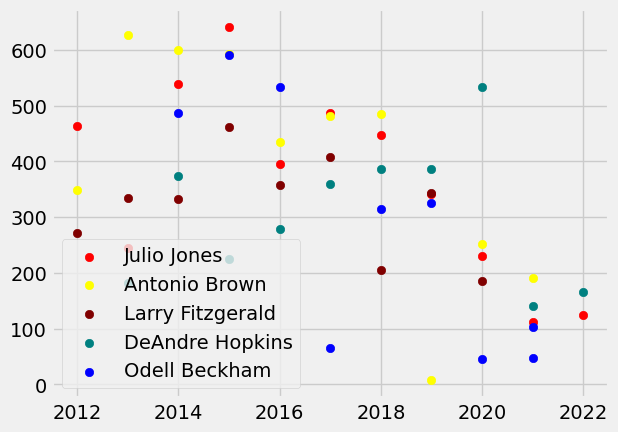

In [ ]:
players = ["Julio Jones", "Antonio Brown", "Larry Fitzgerald", "DeAndre Hopkins", "Odell Beckham"]
colors = ["red", "yellow", "maroon", "teal", "blue"]
x = "season"
y = "receiving_yards_after_catch"
i = 0
for player in players:
  playerDF = df.loc[df.name == player]
  plt.scatter(playerDF[x], playerDF[y], label = player, c=colors[i])
  i += 1

plt.legend(loc="lower left")
plt.show()

Is the above scatterplot better or worse than the below line graph?

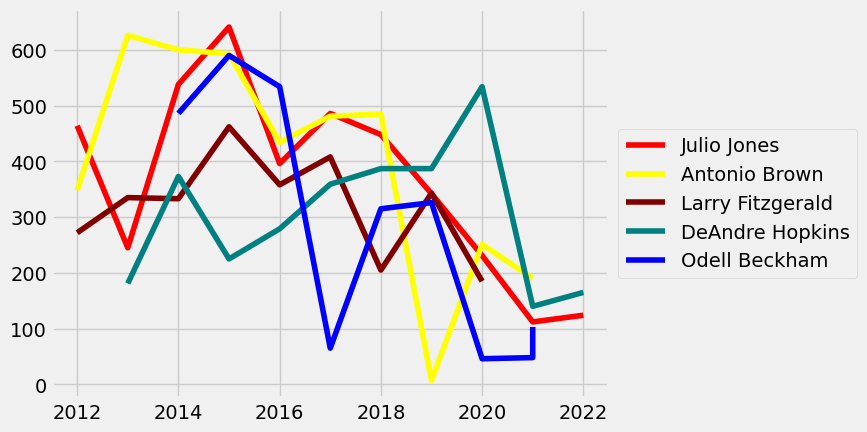

In [ ]:
players = ["Julio Jones", "Antonio Brown", "Larry Fitzgerald", "DeAndre Hopkins", "Odell Beckham"]
colors = ["red", "yellow", "maroon", "teal", "blue"]
x = "season"
y = "receiving_yards_after_catch"
i = 0
for player in players:
  playerDF = df.loc[df.name == player].sort_values("season")
  plt.plot(playerDF[x], playerDF[y], label = player, c=colors[i])
  i += 1

plt.legend(loc = "center left", bbox_to_anchor=(1, 0.5))
plt.show()

#Checkpoint Two: Upload the above graphic you've created to the following drive folder: https://drive.google.com/drive/folders/1wkxC9Mx7yh-m_iMnaKWkpVOKN4xT4jYL?usp=share_link

# Given the variability of season performances, can we get averaged/smoothed values?

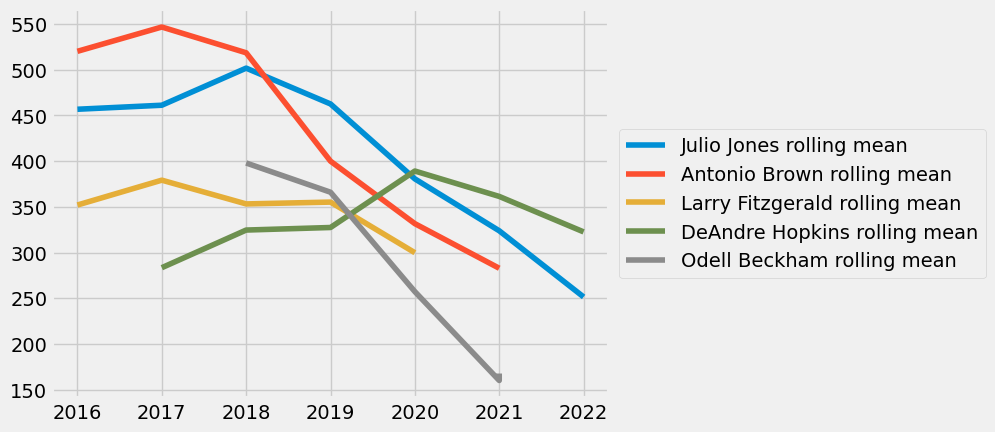

In [ ]:
window_size = 5

players = ["Julio Jones", "Antonio Brown", "Larry Fitzgerald", "DeAndre Hopkins", "Odell Beckham"]
#colors = ["red", "yellow", "maroon", "teal", "blue"]
x = "season"
y = "receiving_yards_after_catch"

for player in players:
  playerDF = df.loc[df.name == player].sort_values("season")
  rolling_mean = playerDF[y].rolling(window=window_size).mean()
  #plt.plot(playerDF[x], playerDF[y], label = player)
  plt.plot(playerDF[x], rolling_mean, label = (player + " rolling mean"))

plt.legend(loc = "center left", bbox_to_anchor=(1, 0.5))
plt.show()


Pop quiz; What does the following code do? What's interesting about the results?

In [ ]:
df.loc[df.season == 2012].sort_values("receiving_yards_after_catch", ascending = False)[:5]

,id,name,position,team,season,season_type,completions,attempts,passing_yards,passing_tds,...,ypg,pr,rookie_season,round,overall,ht,wt,forty,vertical,years_played
6085,1742,Wes Welker,WR,NE,2012,REG,0,0,0,0,...,0.0,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1584,430,Darren Sproles,RB,NO,2012,REG,0,0,0,0,...,0.0,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,57,Andre Johnson,WR,HOU,2012,REG,0,0,0,0,...,0.0,33.87,2003.0,1.0,3.0,2-Jun,230.0,4.41,39.0,10.0
4380,1255,Michael Crabtree,WR,SF,2012,REG,0,0,0,0,...,0.0,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1811,498,Demaryius Thomas,WR,DEN,2012,REG,0,0,0,0,...,0.0,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


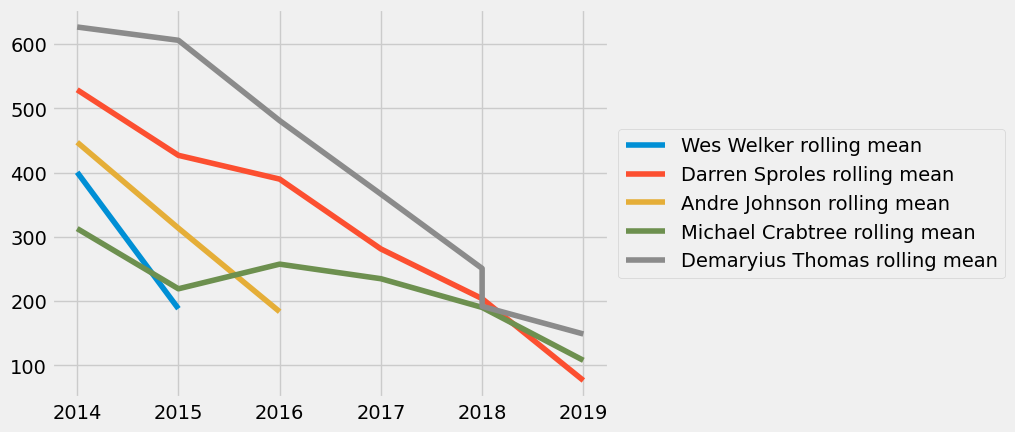

In [ ]:
window_size = 3

players = df.loc[df.season == 2012].sort_values("receiving_yards_after_catch", ascending = False)[:5]["name"]
#colors = ["red", "yellow", "maroon", "teal", "blue"]
x = "season"
y = "receiving_yards_after_catch"

for player in players:
  playerDF = df.loc[df.name == player].sort_values("season")
  rolling_mean = playerDF[y].rolling(window=window_size).mean()
  #plt.plot(playerDF[x], playerDF[y], label = player)
  plt.plot(playerDF[x], rolling_mean, label = (player + " rolling mean"))

plt.legend(loc = "center left", bbox_to_anchor=(1, 0.5))
plt.show()


What's confusing about the below graph? What would you fix?

And just as importantly, what finally gets added to this graph that makes it so much better than any of the others?

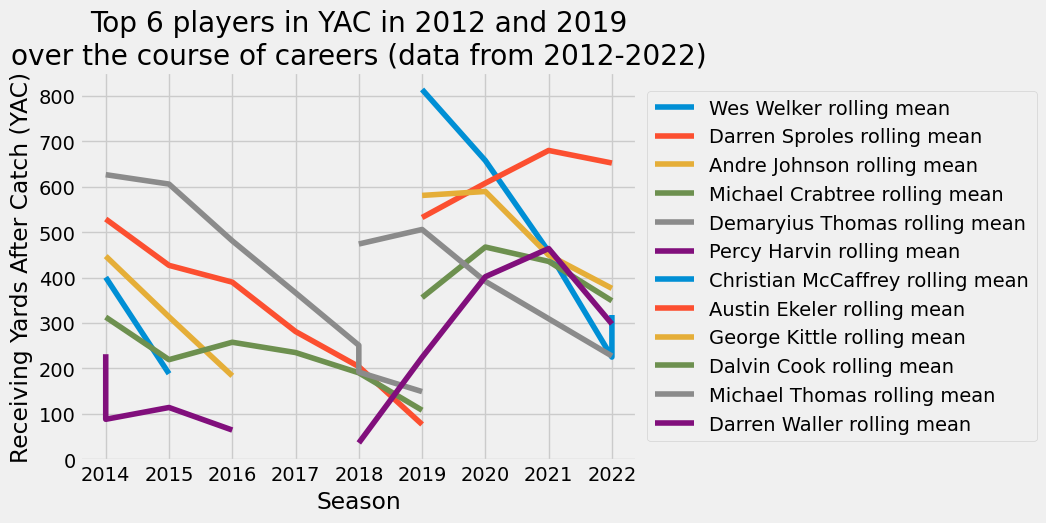

In [ ]:
window_size = 3
players = pd.concat([df.loc[df.season == 2012].sort_values("receiving_yards_after_catch", ascending = False)[:6]["name"],
                      df.loc[df.season == 2019].sort_values("receiving_yards_after_catch", ascending = False)[:6]["name"]])
x = "season"
y = "receiving_yards_after_catch"

for player in players:
  playerDF = df.loc[df.name == player].sort_values("season")
  rolling_mean = playerDF[y].rolling(window=window_size).mean()
  #plt.plot(playerDF[x], playerDF[y], label = player)
  plt.plot(playerDF[x], rolling_mean, label = (player + " rolling mean"))

plt.legend(loc = "center left", bbox_to_anchor=(1, 0.5))
plt.xlabel("Season")
plt.ylabel("Receiving Yards After Catch (YAC)")
plt.title("Top 6 players in YAC in 2012 and 2019\nover the course of careers (data from 2012-2022)")
plt.show()

Let's try a similar graph as the one above, but with more simplistic data sources

In [ ]:
df.loc[df.season == 2012].sort_values(y, ascending = False)[:6]

,id,name,position,team,season,season_type,completions,attempts,passing_yards,passing_tds,...,ypg,pr,rookie_season,round,overall,ht,wt,forty,vertical,years_played
6085,1742,Wes Welker,WR,NE,2012,REG,0,0,0,0,...,0.0,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1584,430,Darren Sproles,RB,NO,2012,REG,0,0,0,0,...,0.0,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,57,Andre Johnson,WR,HOU,2012,REG,0,0,0,0,...,0.0,33.87,2003.0,1.0,3.0,2-Jun,230.0,4.41,39.0,10.0
4380,1255,Michael Crabtree,WR,SF,2012,REG,0,0,0,0,...,0.0,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1811,498,Demaryius Thomas,WR,DEN,2012,REG,0,0,0,0,...,0.0,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4775,1363,Percy Harvin,WR,MIN,2012,REG,0,0,0,0,...,0.0,33.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


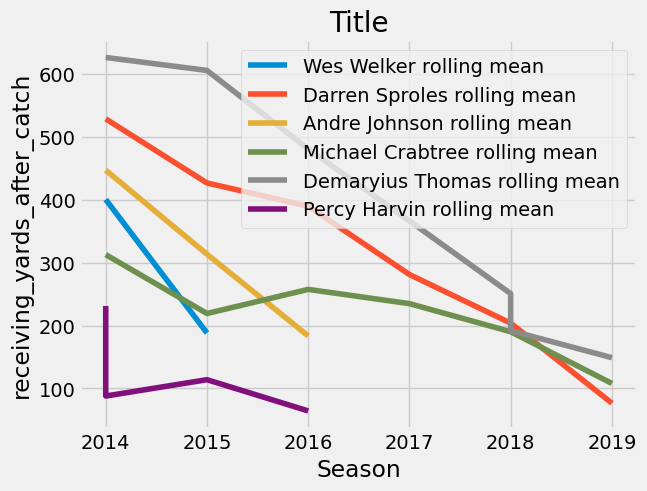

In [ ]:
x = "season"
y = "receiving_yards_after_catch"


players = df.loc[df.season == 2012].sort_values(y, ascending = False)[:6]["name"]
#                Season                      Value Top values     How many players?


window_size = 3 #How many years are we rolling the mean?
for player in players:
  playerDF = df.loc[df.name == player].sort_values("season")
  rolling_mean = playerDF[y].rolling(window=window_size).mean()
  #plt.plot(playerDF[x], playerDF[y], label = player) #If you don't want a rolling mean
  plt.plot(playerDF[x], rolling_mean, label = (player + " rolling mean"))

plt.legend()
plt.xlabel("Season")
plt.ylabel(y)
plt.title("Title")
plt.show()

#Final Checkpoint: Upload the above graphic you've created to the following drive folder: https://drive.google.com/drive/folders/1wkxC9Mx7yh-m_iMnaKWkpVOKN4xT4jYL?usp=share_link

If colors are confusing, you can use other things -- like logos

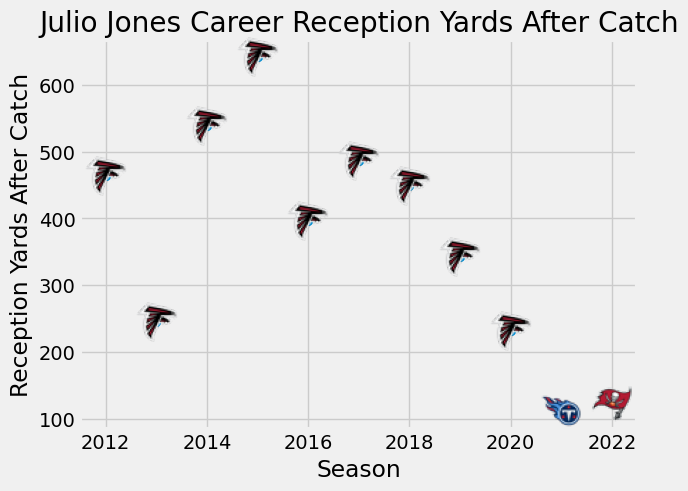

In [ ]:
# Potential Advanced Stuff

from PIL import Image
import requests
from io import BytesIO

player = "Julio Jones"
playerDF = df.loc[df.name == player].reset_index(drop=True)
x = "season"
y = "receiving_yards_after_catch"

# Sample image URLs

#Given the below urls, can you come up with a way to iterate through a list of urls that won't require copy-pasting 32 urls?
image_urls = [
    'https://upload.wikimedia.org/wikipedia/commons/thumb/6/60/New_York_Giants_logo.svg/2560px-New_York_Giants_logo.svg.png',
    'https://a.espncdn.com/i/teamlogos/nfl/500/atl.png',
    'https://a.espncdn.com/i/teamlogos/nfl/500/tb.png','https://a.espncdn.com/i/teamlogos/nfl/500/ten.png',
]
image_abbs = np.array(["NYG", "ATL", "TB", "TEN"])

# Create a scatter plot with images
fig, ax = plt.subplots()
ax.scatter(playerDF[x], playerDF[y])
image_size = (30, 30)
i = 0

for x0, y0 in zip(playerDF[x], playerDF[y]):
    ind = np.where(image_abbs == playerDF["team"][i])[0][0]
    response = requests.get(image_urls[ind])
    image = Image.open(BytesIO(response.content))
    image = image.resize(image_size)
    imagebox = OffsetImage(image)  # You can adjust the zoom level
    ab = AnnotationBbox(imagebox, (x0, y0), frameon=False)
    ax.add_artist(ab)
    i += 1

# Set labels for the x and y axes
ax.set_xlabel('Season')
ax.set_ylabel('Reception Yards After Catch')
ax.set_title("Julio Jones Career Reception Yards After Catch")

# Show the plot
plt.show()

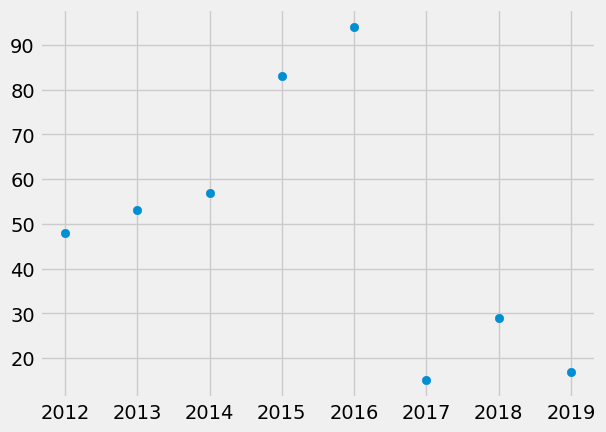

In [ ]:
ds = df.loc[df.name == "Darren Sproles"]
plt.scatter(ds.season, ds.carries)

In [ ]:
for col in df.columns:
  print(df.loc[df.name == "Darren Sproles"].loc[df.season== 2012][col])

1584    430
Name: id, dtype: int64
1584    Darren Sproles
Name: name, dtype: object
1584    RB
Name: position, dtype: object
1584    NO
Name: team, dtype: object
1584    2012
Name: season, dtype: int64
1584    REG
Name: season_type, dtype: object
1584    0
Name: completions, dtype: int64
1584    0
Name: attempts, dtype: int64
1584    0
Name: passing_yards, dtype: int64
1584    0
Name: passing_tds, dtype: int64
1584    0
Name: interceptions, dtype: int64
1584    0
Name: sacks, dtype: int64
1584    0
Name: sack_yards, dtype: int64
1584    0
Name: sack_fumbles, dtype: int64
1584    0
Name: sack_fumbles_lost, dtype: int64
1584    0
Name: passing_air_yards, dtype: int64
1584    0
Name: passing_yards_after_catch, dtype: int64
1584    0
Name: passing_first_downs, dtype: int64
1584    0
Name: passing_2pt_conversions, dtype: int64
1584    48
Name: carries, dtype: int64
1584    244
Name: rushing_yards, dtype: int64
1584    1
Name: rushing_tds, dtype: int64
1584    0
Name: rushing_fumbles, dtype: